In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


c:\Users\86177\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\86177\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\Users\86177\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
bank_data = pd.read_csv("./data/bank-additional-full.csv", sep = ';')
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Visualization

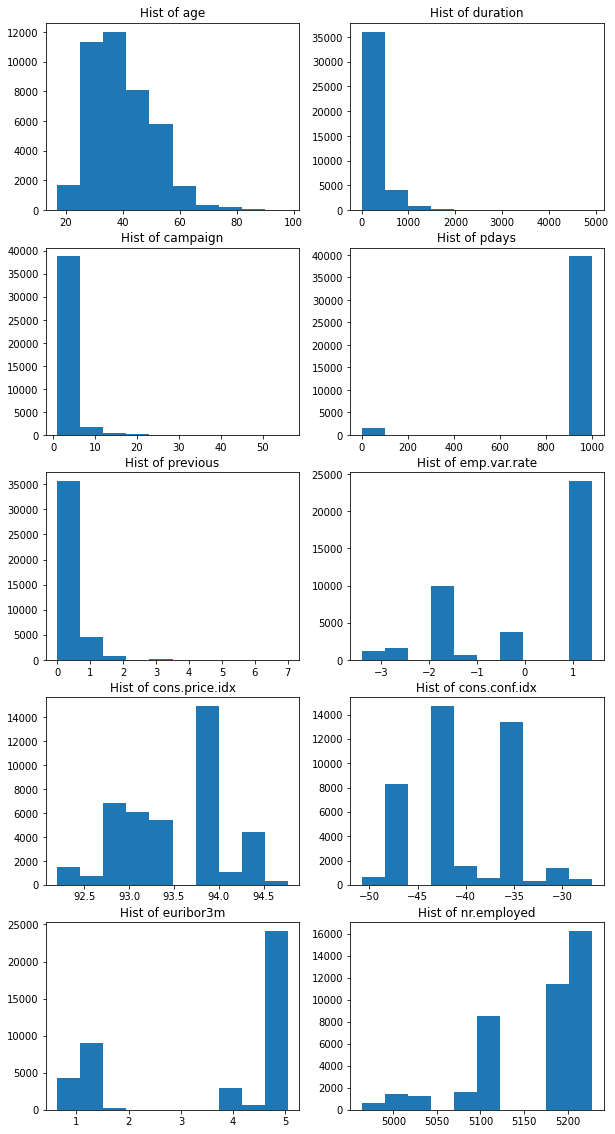

In [3]:
qt_cols = bank_data.select_dtypes(include=['int64', 'float64']).columns
ql_cols = bank_data.iloc[:,:-1].select_dtypes(include=['object']).columns

plt.figure(figsize=(10,20))

i = 1
for col in qt_cols:
    plt.subplot(5,2,i)
    i += 1
    plt.hist(bank_data[col])
    plt.title('Hist of '+ col)
    

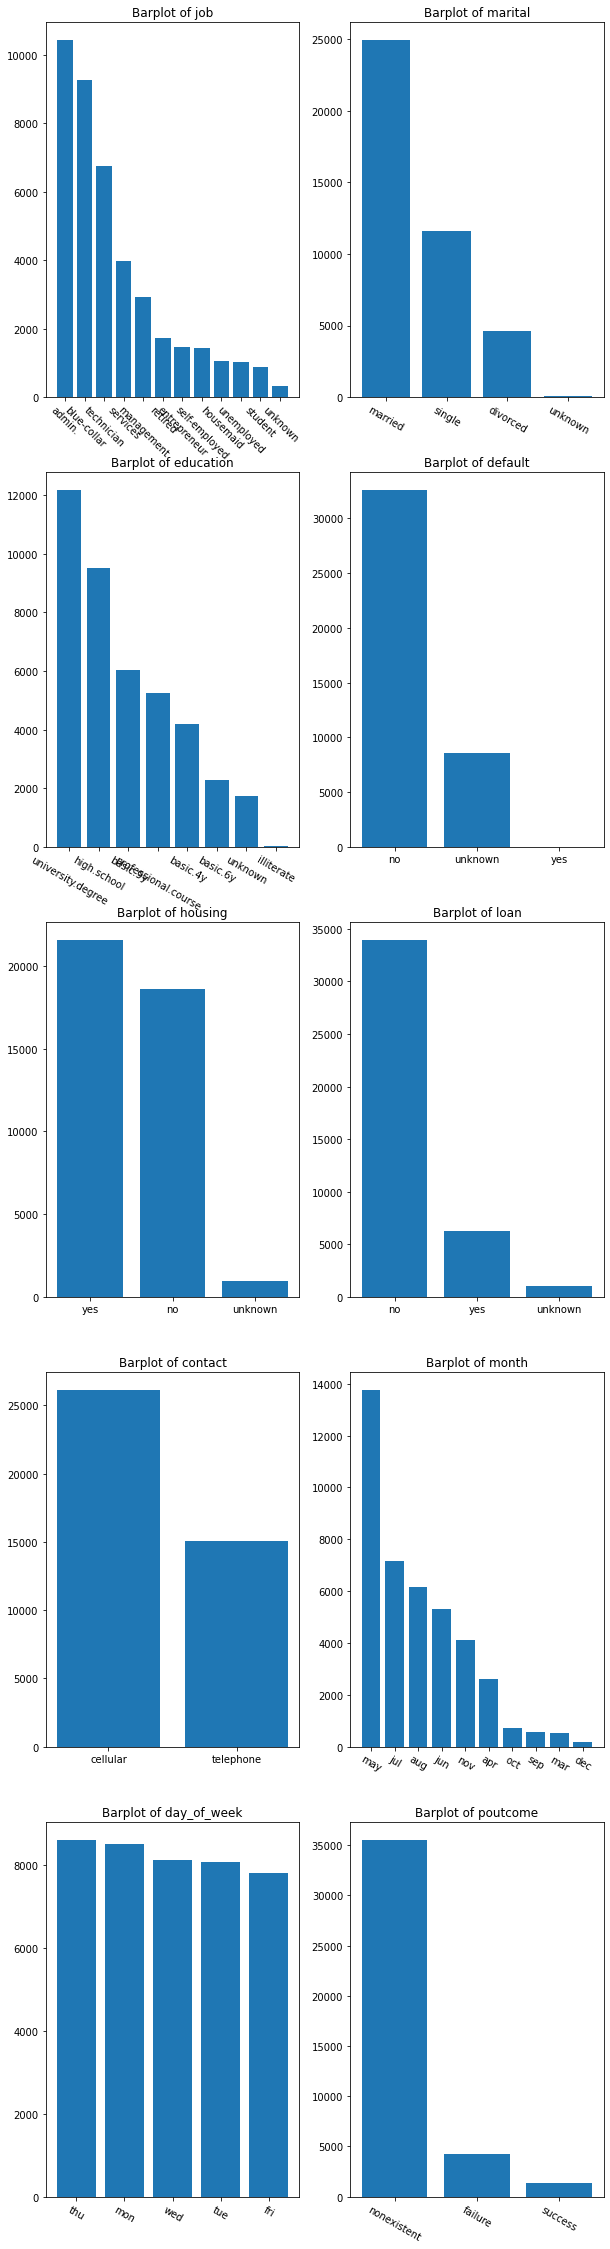

In [4]:
i = 1
plt.figure(figsize=(10,40))
rotation = [45,30,30,0,0,0,0,30,30,30]
for col in ql_cols:   
    plt.subplot(5,2,i)
    plt.bar(bank_data[col].value_counts().index, bank_data[col].value_counts())
    plt.title('Barplot of '+ col)
    plt.xticks(rotation = -rotation[i-1])
    i += 1

### Wrangling

In [5]:
X = bank_data[qt_cols]
for col in ql_cols:
    X = pd.concat([X, pd.get_dummies(bank_data[col]).iloc[:,:-1]], axis = 1)

y = bank_data.iloc[:,-1].map({'yes':1, 'no':0})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1017) 


### Training
#### Linear Kernel

In [7]:
param_grid = {
    'linear_svc__C': [0.1, 0.5, 1, 3, 5, 10]  
}

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", svm.SVC(kernel='linear')),
])

grid_search = GridSearchCV(svm_clf, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Best parameters: {'linear_svc__C': 0.1}
Accuracy: 0.9039815489196407
Precision: 0.6838407494145199
Recall: 0.3080168776371308


Add class_weight='balanced'

In [8]:
param_grid = {
    'linear_svc__C': [0.1, 0.5, 1, 3, 5, 10]  
}

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", svm.SVC(kernel='linear', class_weight='balanced')),
])

grid_search = GridSearchCV(svm_clf, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Best parameters: {'linear_svc__C': 10}
Accuracy: 0.8544549647972809
Precision: 0.43696634856855854
Recall: 0.9177215189873418


#### Poly Kernel

In [9]:
param_grid = {
    'linear_svc__degree': [2, 3, 5],  
    'linear_svc__coef0': [0.5, 1.0, 2.0], 
    'linear_svc__C': [0.1, 1, 10], 
}

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", svm.SVC(kernel='poly', class_weight='balanced')),
])

grid_search = GridSearchCV(svm_clf, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Best parameters: {'linear_svc__C': 10, 'linear_svc__coef0': 0.5, 'linear_svc__degree': 5}
Accuracy: 0.8849235251274581
Precision: 0.5
Recall: 0.5548523206751055


#### RBF Kernel

In [10]:
param_grid = {
    'linear_svc__gamma': [0.1, 1.0, 10], 
    'linear_svc__C': [0.1, 1, 10], 
}

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", svm.SVC(kernel='rbf', class_weight='balanced')),
])

grid_search = GridSearchCV(svm_clf, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Best parameters: {'linear_svc__C': 1, 'linear_svc__gamma': 10}
Accuracy: 0.884316581694586
Precision: 0.38095238095238093
Recall: 0.008438818565400843


#### Sigmoid Kernel

In [11]:
param_grid = {
    'linear_svc__gamma': [0.1, 1.0, 10], 
    'linear_svc__coef0':[0.1, 1.0, 10], 
    'linear_svc__C': [0.1, 1, 10], 
}

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", svm.SVC(kernel='sigmoid', class_weight='balanced')),
])

grid_search = GridSearchCV(svm_clf, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Best parameters: {'linear_svc__C': 0.1, 'linear_svc__coef0': 0.1, 'linear_svc__gamma': 0.1}
Accuracy: 0.7320951687302744
Precision: 0.2644968200523756
Recall: 0.7457805907172996
